In [72]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

import pandas as pd
import math
import operator
import tensorflow as tf
import random
import time
import heapq

import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('/Users/architaggarwal/Downloads/ELL409/Medical_data.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,Health,TEST1,TEST2,TEST3
0,HEALTHY,1.801336,0.130699,2.485558
1,MEDICATION,0.731262,4.170997,0.275867
2,MEDICATION,3.174109,0.045424,0.011942
3,SURGERY,0.194552,2.254838,1.215934
4,SURGERY,-0.036754,2.005132,0.667313
5,MEDICATION,1.709607,1.522915,-0.085577
6,MEDICATION,0.804422,0.858293,-0.033179
7,MEDICATION,1.068231,3.205729,-0.106085
8,SURGERY,-0.170948,2.443408,1.614545
9,HEALTHY,1.446148,-0.017901,2.882110


In [74]:
x = df.loc[:, "TEST1":"TEST3"]
y = df.loc[:, "Health"]
x = x.values
y = y.values
b, c = np.unique(y, return_inverse=True)
y = c
print(x.shape, y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
# stratSplit = StratifiedShuffleSplit(y, 1, test_size=0.33,random_state=42)
# StratifiedShuffleSplit(y, n_iter=1, test_size=0.33)
# for train_idx,test_idx in stratSplit:
#     X_train=X[train_idx]
#     y_train=y[train_idx]
# print(X_train)
# print(y_train)
# x_train = x[0:2500, :]
# x_test = x[2500:3000, :]
# y_train = y[0:2500]
# y_test = y[2500:3000]

((3000, 3), (3000,))


In [75]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (2100, 3), 'y_train shape:', (2100,))


In [76]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

('x_test shape:', (900, 3), 'y_test shape:', (900,))


In [77]:
df.describe()

,TEST1,TEST2,TEST3
count,3000.000000,3000.000000,3000.000000
mean,1.110536,1.112470,1.121078
std,1.222244,1.316130,1.252465
min,-1.605940,-1.866510,-1.720930
25%,0.035033,-0.002508,0.005586
50%,0.967292,0.640691,0.928323
75%,2.107152,2.239074,2.154511
max,4.589089,5.148352,5.098854


In [78]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
#PCA
A = x_train
M = mean(x_train.T, axis=1)
C = A - M
V = cov(C.T)
values, vectors = eig(V)
print(vectors)
print("------")
print(values)
print("------")
P = vectors.T.dot(C.T)
print(P.T)

[[ 0.52920478  0.69065256  0.4928908 ]
 [ 0.67595742  0.00794936 -0.7368978 ]
 [ 0.51285852 -0.72314303  0.46264489]]
------
[ 0.18452813  1.12986663  1.68703449]
------
[[ 0.084972    3.12555922  1.00036182]
 [ 0.22911221  1.89287569  0.62955159]
 [ 0.95856051  1.45115979 -0.75745194]
 ..., 
 [-0.22248186  0.6965168  -0.58377915]
 [ 0.24197143 -0.58020063 -1.30752294]
 [ 0.16552984 -1.44836112  0.92900063]]


In [80]:
values_index = sorted(range(len(values)), key=lambda k: values[k], reverse = True)
print(values_index)
values_sorted = sorted(values, reverse = True)
print(values_sorted)

[2, 1, 0]
[1.6870344851094183, 1.12986663378149, 0.18452813313386307]


[ 1.68703449  2.81690112  3.00142925]


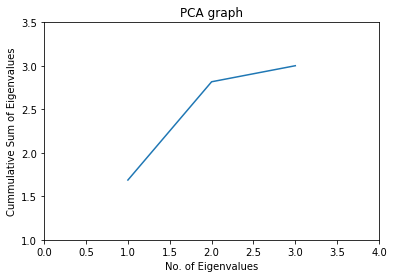

In [81]:
#plotting cummulative sum of eigenvalues vs no. of eigenvalues to see cutoff for no. of principal components
cumm_sum = np.zeros((3))
till_now = 0.0
for i in range(3):
    cumm_sum[i] = till_now + values_sorted[i]
    till_now = till_now + values_sorted[i]
no_of_eigenvalues = range(1,4)
print(cumm_sum)
plt.plot(no_of_eigenvalues, cumm_sum)
plt.axis([0, 4, 1, 3.5])
plt.xlabel("No. of Eigenvalues")
plt.ylabel("Cummulative Sum of Eigenvalues")
plt.title("PCA graph")
plt.show()

In [82]:
#Mean of each attribute for each class
def mean_attribute_class(x_train, y_train, n_classes, n_features):
    mean_values = np.zeros((n_classes, n_features))
    store_frequency = [0]*n_classes
    for i in range(len(x_train)):
        mean_values[y_train[i]] = mean_values[[y_train[i]]] + x_train[i]
        store_frequency[y_train[i]] += 1
    for a in range(n_classes):
        mean_values[a] = mean_values[a].astype('float32') / store_frequency[a]
    return mean_values

In [83]:
mean_values = mean_attribute_class(x_train, y_train, 3, 3)
mean_values

array([[ 0.66113311, -0.84610021,  0.59711742],
       [ 0.24495496,  0.36134645, -0.8845464 ],
       [-0.90608805,  0.48475373,  0.28742903]])

In [84]:
#Standard Deviation(N-1) of rach attribute for each class
def standard_deviation(x_train, y_train, n_classes, n_features):
    std_values = np.zeros((n_classes, n_features))
    store_frequency = [0]*n_classes
    for i in range(x_train.shape[0]):
        std_values[y_train[i]] = std_values[y_train[i]] + (x_train[i] - mean_values[y_train[i]])*(x_train[i] - mean_values[y_train[i]])
        store_frequency[y_train[i]] += 1
    for a in range(n_classes):
        std_values[a] = std_values[a].astype('float32') / (store_frequency[a] - 1)
    std_values = np.sqrt(std_values)
    return std_values

In [85]:
std_values = standard_deviation(x_train, y_train, 3, 3)
std_values

array([[ 0.81852229,  0.1699993 ,  0.74147465],
       [ 0.98978966,  0.960917  ,  0.17798234],
       [ 0.18614054,  0.98439855,  1.09521452]])

In [15]:
#Naive Bayes
def calculateprobability(x_test, y_test, n_classes, n_features):
    count = 0
    for i in range(x_test.shape[0]):
        store_prob = np.ones((n_classes))
        for j in range(n_features):
            for k in range(n_classes):
                exponent = math.exp((-1*math.pow(x_test[i][j] - mean_values[k][j], 2)) / math.pow(std_values[k][j], 2))
                final_term = (1 / (math.sqrt(2*math.pi)*std_values[k][j])) * exponent
                store_prob[k] = store_prob[k] * final_term
        index, value = max(enumerate(store_prob), key=operator.itemgetter(1))
#         print(store_prob)
#         print("Prob = ", value, "Class = ", index, "Original = ", y_train[i])
        if index == y_test[i]:
            count = count + 1
        print(i)
    print(count, x_test.shape[0])

In [16]:
calculateprobability(x_test, y_test, 3, 3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [17]:
#K Means Clustering
def calculatecentroids(x_train, y_train, k, tolerance=0.0001, max_iterations=1000):
#     k = 10
#     tolerance = 0.0001
#     max_iterations = 1000
    centroids = {}
    for i in range(k):
        print("hallelujah")
        choose = random.randint(0, x_train.shape[0] - k) + i
        centroids[i] = x_train[choose]
    print('Centroids = ', centroids)
    for i in range(max_iterations):
        print("i = ", i)
        classes = {}
        for j in range(k):
            classes[j] = []
        for each in x_train:
            distances = [np.linalg.norm(each - centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(each)
        
        previous = dict(centroids)
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis = 0)
        
        isOptimal = True
        for centroid in centroids:
            original_centroid = previous[centroid]
            curr = centroids[centroid]
            print("Factor = ", np.sum((curr - original_centroid)/original_centroid * 100.0))
            if abs(np.sum((curr - original_centroid)/original_centroid * 100.0)) > tolerance:
                isOptimal = False
        if isOptimal:
            break
    return centroids
#     count = 0
#     for i in range(60000):
#         distances = [np.linalg.norm(x_train_final[i] - centroids[centroid]) for centroid in centroids]
#         classification = distances.index(min(distances))
#         if classification == y_train[i]:
#             count = count + 1
#         print(i)
#     print(count)

In [18]:
centroids = calculatecentroids(x_train, y_train, 3, 0.0001, 1000)
centroids

hallelujah
hallelujah
hallelujah
('Centroids = ', {0: array([-0.7386114 ,  1.75979527, -1.05930422]), 1: array([-0.46539786, -0.79734509,  1.37769923]), 2: array([-0.52137905,  0.60962291, -0.73132008])})
('i = ', 0)
('Factor = ', -3.774887177224624)
('Factor = ', -156.84405563282402)
('Factor = ', -229.18768428670296)
('i = ', 1)
('Factor = ', -45.710741426737073)
('Factor = ', -26.027233440046139)
('Factor = ', 45.541375682774508)
('i = ', 2)
('Factor = ', -32.448919121070929)
('Factor = ', -30.755042221111378)
('Factor = ', 188.97855524212034)
('i = ', 3)
('Factor = ', -8.2273632696433996)
('Factor = ', -26.17937870113628)
('Factor = ', 26.208494966139959)
('i = ', 4)
('Factor = ', -3.1957929613823937)
('Factor = ', -44.908189706724215)
('Factor = ', 9.8422835821646046)
('i = ', 5)
('Factor = ', -1.555525526402777)
('Factor = ', -127.17081177356401)
('Factor = ', 3.8700930627887837)
('i = ', 6)
('Factor = ', -1.8914433126488952)
('Factor = ', 282.04404588676636)
('Factor = ', 4.5653

{0: array([-0.67664176,  1.05209157, -0.59009437]),
 1: array([-0.3519104 , -0.76053506,  1.23171384]),
 2: array([ 1.12631016, -0.67040551, -0.2894633 ])}

In [19]:
#K Nearest Neighbour
def euclidean_distance(instance1, instance2):
    sum = 0
    for i in range(len(instance1)):
        sum += (instance1[i] - instance2[i])**2
    sum = math.sqrt(sum)
    return sum

def predict_accuracy(x_train, y_train, x_test, y_test, k, n_classes, n_features):
#     k = 10
    count = 0
    for i in range(x_test.shape[0]):
#         start = time.time()
#         store_distances = np.zeros((x_train_final.shape[0], 2))
        x_train_final_copy = x_train - x_test[i]
        store_distances = np.sqrt(np.sum(np.square(x_train_final_copy), axis=1))
#         store_distances = [[np.linalg.norm(x_test_final[i] - each), each1] for each, each1 in zip(x_train_final, y_train)]
#         for j in range(x_train_final.shape[0]):
# #             distance = euclidean_distance(x_test_final[i], x_train_final[j])
#             distance = np.linalg.norm(x_test_final[i] - x_train_final[j])
#             store_distances[j] = [distance, y_train[j]]
#         store_distances = np.array(store_distances)
#         print(store_distances.shape)
#         print(store_distances)
        store_labels = y_train[heapq.nsmallest(k, range(len(store_distances)), store_distances.take)]
        final_class = stats.mode(store_labels).mode[0]
#         store_frequency = [0]*10
#         print(store_distances)
#         for j in range(len(store_distances)):
#             store_frequency[int(store_distances[j][1])] += 1
            
#         final_class = store_frequency.index(max(store_frequency))
        
        if y_test[i] == final_class:
            count = count + 1
#         print(final_class, y_test[i])
#         print(count, i)
#         end = time.time()
#         print(end - start)
    return(count)
#     print(count)

In [20]:
count = predict_accuracy(x_train, y_train, x_test, y_test, 3, 3, 3)
count

819

In [21]:
count_class = np.bincount(y_train)
count_class

array([700, 700, 700])

In [22]:
#Bayes Classifier
def calculate_covariance(x_train, y_train, n_classes, n_features, count_class):
    store_seperate = {}
    x_train_sorted = x_train[np.argsort(y_train)]
    x_train_sorted = x_train_sorted[:,0:n_features]
    first = 0
    second = count_class[0]
    for i in range(n_classes):
        final_matrix = x_train_sorted[first : second, :] - mean_values[i][0:n_features]
        covariance_matrix = np.dot(final_matrix.T, final_matrix) / count_class[i]
        sign, logdet = np.linalg.slogdet(covariance_matrix)
#         print(sign, logdet)
        store_seperate[i] = [np.sqrt(sign*np.exp(logdet)), np.linalg.inv(covariance_matrix)]
#         print(i)
        if i < (n_classes - 1):
            first = second
            second = second + count_class[i+1]
    return store_seperate

def calculate_bayes(x_test, y_test, n_classes, store_covariance, n_features):
    count = 0
    for i in range(x_test.shape[0]):
        store_probability = [0]*n_classes
        for j in range(n_classes):
            final_matrix = x_test[i][0:n_features] - mean_values[j][0:n_features]
            exponent = np.exp(-0.5*final_matrix.T.dot(store_covariance[j][1]).dot(final_matrix))
            store_probability[j] = (1/(math.pow((2*np.pi), n_features/2)*store_covariance[j][0]))*exponent
#         store_probability = [np.exp(-0.5*((x_test[i][0:20] - mean_values[j][0:20]).T.dot(store_covariance[j][1]).dot((x_test[i][0:20] - mean_values[j][0:20]))))*(1/(np.pow((2*np.pi), 20/2)*store_covariance[j][1])) for j in range(10)]
        final_class = store_probability.index(max(store_probability))
        if final_class == y_test[i]:
            count = count + 1
#         print(store_probability, final_class)
#         print(count, i)
    return count

covariance cal
(623, 1)
covariance cal
(743, 2)
covariance cal
(819, 3)


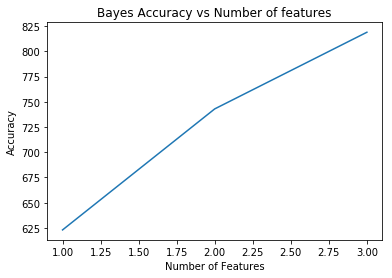

In [86]:
x_values = range(1, 4)
y_values = [0]*3
for i in range(1,4):
    store_covariance = calculate_covariance(x_train, y_train, 3, i, count_class)
    print("covariance cal")
    y_values[i-1] = calculate_bayes(x_test, y_test, 3, store_covariance, i)
    print(y_values[i - 1], i)
plt.plot(x_values, y_values)
plt.title("Bayes Accuracy vs Number of features")
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.show()

In [45]:
#Multinomial Naive Bayes
def likelihood(x_train, y_train, n_classes, n_features):
    count_class = np.bincount(y_train)
    class_frequency = count_class.astype('float32') / len(y_train)
    store_prob = np.zeros((n_classes, n_features))
    x_train_sorted = x_train[np.argsort(y_train)]
    x_train_sorted = x_train_sorted[:,0:n_features]
    first = 0
    second = count_class[0]
    for i in range(n_classes):
        final_matrix = x_train_sorted[first:second, :]
        col_sum = np.sum(final_matrix, axis = 0) + 1
        denominator = np.sum(final_matrix) + n_features
#         print store_prob.shape, col_sum.shape
        store_prob[i] = col_sum.astype('float32') / denominator
        if i < (n_classes - 1):
            first = second
            second = second + count_class[i+1]
    return store_prob, class_frequency
def calculate_multinomial_bayes(x_test, y_test, n_classes, n_features, store_prob, class_frequency):
    store_each_class = [0]*n_classes
    count = 0
    class_frequency_log = np.log(class_frequency)
    store_prob_log = np.log(store_prob)
    x_test = x_test[:,0:n_features]
    store_pred = [0]*x_test.shape[0]
    for i in range(x_test.shape[0]):
        store_each_class = class_frequency_log + np.sum(store_prob_log*x_test[i], axis = 1)
        index, value = max(enumerate(store_each_class), key=operator.itemgetter(1))
        final_class = index
        store_pred[i] = final_class
        if y_test[i] == final_class:
            count += 1
#         print store_each_class
#         print final_class, y_test[i]
    precision, recall, f_score, support = precision_recall_fscore_support(y_test, store_pred, average='weighted')
    return(count, precision, recall, f_score)

In [62]:
#Categorize based on percentile
store_percentiles = [np.percentile(x_train, j, axis=0) for j in range(25,125,25)]
n_features = 3
store_count = np.zeros((n_features, 4))
for k in range(1, n_features+1):
    x_train_bayes = np.copy(x_train)
    x_test_bayes = np.copy(x_test)
#     print(store_percentiles)
    store_percentiles.append(store_percentiles[len(store_percentiles) - 1] + 1)
#     print(store_percentiles)
    for i in range(len(store_percentiles)):
        for j in range(k):
            x_train_bayes[x_train[:,j] < store_percentiles[len(store_percentiles)-1 - i][j], j] = len(store_percentiles)-1 - i + 1
            x_test_bayes[x_test[:,j] < store_percentiles[len(store_percentiles)-1 - i][j], j] = len(store_percentiles)-1 - i + 1
#     print x_train_bayes
    store_prob, class_frequency = likelihood(x_train_bayes, y_train, 3, k)
    count, precision, recall, f_score = calculate_multinomial_bayes(x_test_bayes, y_test, 3, k, store_prob, class_frequency)
    store_count[k-1][0], store_count[k-1][1], store_count[k-1][2], store_count[k-1][3] = count, precision, recall, f_score
    print k, count, precision, recall, f_score
store_count[:,0] = store_count[:,0].astype('float32') / x_test.shape[0]

1 300 0.111111111111 0.333333333333 0.166666666667
2 632 0.696438929542 0.702222222222 0.687312751458
3 651 0.735879099924 0.723333333333 0.712661780758


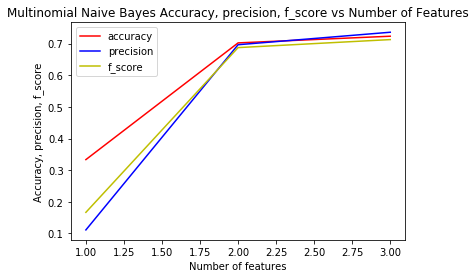

In [63]:
#Calculate multinomial Bayes accuracy
# store_prob, class_frequency = likelihood(x_train_bayes, y_train, 2, 9)
# count = calculate_multinomial_bayes(x_test, y_test, 2, 9, store_prob, class_frequency)
# print count
plt.plot(range(1,4), store_count[:,0], 'r', label = 'accuracy')
plt.plot(range(1, 4), store_count[:,1], 'b', label = 'precision')
# plt.plot(range(1, 4), store_count[:,2], 'g', label = 'recall')
plt.plot(range(1, 4), store_count[:,3], 'y', label = 'f_score')
plt.legend(loc = 'upper left')
plt.title("Multinomial Naive Bayes Accuracy, precision, f_score vs Number of Features")
plt.xlabel("Number of features")
plt.ylabel("Accuracy, precision, f_score")
plt.show()

In [24]:
#K Fold Cross Validation
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
skf.get_n_splits(x, y)
print(skf)
store_fold = [0]*50
for train_index, test_index in skf.split(x, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train_dummy, x_test_dummy = x[train_index], x[test_index]
    y_train_dummy, y_test_dummy = y[train_index], y[test_index]
    scaler = StandardScaler()
    scaler.fit(x_train_dummy)
    x_train_dummy = scaler.transform(x_train_dummy)
    x_test_dummy = scaler.transform(x_test_dummy)
#     print(np.bincount(y_train_dummy), np.bincount(y_test_dummy))
#     A = x_train_dummy
#     M = mean(x_train_dummy.T, axis=1)
#     C = A - M
#     V = cov(C.T)
#     values, vectors = eig(V)
#     print(vectors)
#     print("------")
#     print(values)
#     print("------")
#     P = vectors.T.dot(C.T)
#     print(P.T)
#     C_test = x_test_dummy - M
#     P_test = vectors.T.dot(C_test.T)
#     print(P_test.T)
#     x_train_dummy = P.T[:, 0:3]
#     x_test_dummy = P_test.T[:, 0:3]
    for j in range(1, 51):
        count = predict_accuracy(x_train_dummy, y_train_dummy, x_test_dummy, y_test_dummy, j, 3, 3)
        store_fold[j-1] += count
        print(i, j, count)
    
#     mean_values_dummy = mean_attribute_class(x_train_dummy, y_train_dummy, 3, 3)
#     std_values_dummy = standard_deviation(x_train_dummy, y_train_dummy, 3, 3)
print(store_fold)
print(store_fold.index(max(store_fold)), max(store_fold))

StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
(3, 1, 529)
(3, 2, 524)
(3, 3, 532)
(3, 4, 532)
(3, 5, 534)
(3, 6, 538)
(3, 7, 537)
(3, 8, 536)
(3, 9, 533)
(3, 10, 541)
(3, 11, 535)
(3, 12, 540)
(3, 13, 536)
(3, 14, 535)
(3, 15, 530)
(3, 16, 532)
(3, 17, 531)
(3, 18, 530)
(3, 19, 529)
(3, 20, 535)
(3, 21, 531)
(3, 22, 535)
(3, 23, 528)
(3, 24, 530)
(3, 25, 525)
(3, 26, 529)
(3, 27, 524)
(3, 28, 526)
(3, 29, 526)
(3, 30, 526)
(3, 31, 527)
(3, 32, 524)
(3, 33, 525)
(3, 34, 526)
(3, 35, 528)
(3, 36, 528)
(3, 37, 527)
(3, 38, 529)
(3, 39, 528)
(3, 40, 526)
(3, 41, 529)
(3, 42, 526)
(3, 43, 529)
(3, 44, 528)
(3, 45, 530)
(3, 46, 529)
(3, 47, 527)
(3, 48, 526)
(3, 49, 525)
(3, 50, 528)
(3, 1, 521)
(3, 2, 508)
(3, 3, 537)
(3, 4, 532)
(3, 5, 541)
(3, 6, 534)
(3, 7, 539)
(3, 8, 541)
(3, 9, 539)
(3, 10, 544)
(3, 11, 542)
(3, 12, 542)
(3, 13, 545)
(3, 14, 545)
(3, 15, 542)
(3, 16, 545)
(3, 17, 543)
(3, 18, 543)
(3, 19, 545)
(3, 20, 545)
(3, 21, 542)
(3, 22, 542)
(3, 23, 544)
(3, 24, 544

In [69]:
store_fold = np.array(store_fold)
store_fold = store_fold.astype('float32') / len(x)
store_fold

array([ 0.88300002,  0.86233336,  0.89700001,  0.89200002,  0.90166664,
        0.89999998,  0.903     ,  0.89933336,  0.89999998,  0.90366668,
        0.89999998,  0.90166664,  0.90399998,  0.90133333,  0.90100002,
        0.90100002,  0.90166664,  0.90033334,  0.90066665,  0.90133333,
        0.89933336,  0.90133333,  0.89566666,  0.89533335,  0.89333332,
        0.89466667,  0.89533335,  0.89566666,  0.89366668,  0.89433336,
        0.89466667,  0.89233333,  0.89433336,  0.89300001,  0.89233333,
        0.89366668,  0.89133334,  0.89399999,  0.89499998,  0.89366668,
        0.89200002,  0.89166665,  0.89233333,  0.89233333,  0.89066666,
        0.89200002,  0.88866669,  0.88933331,  0.88833332,  0.89066666], dtype=float32)

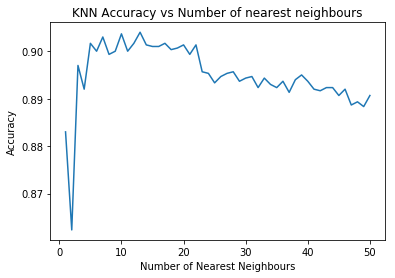

In [71]:
plt.plot(range(1,51), store_fold)
plt.title("KNN Accuracy vs Number of nearest neighbours")
plt.ylabel('Accuracy')
plt.xlabel('Number of Nearest Neighbours')
plt.show()

In [28]:
df_test = pd.read_csv('/Users/architaggarwal/Desktop/sem 7/ell409/data/test_medical.csv')
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test

,Health,TEST1,TEST2,TEST3
0,HEALTHY,-0.892608,-0.061652,3.243274
1,HEALTHY,2.874266,0.072295,2.560248
2,MEDICATION,0.999951,1.197478,-0.088324
3,HEALTHY,1.833488,0.009929,1.749167
4,MEDICATION,1.463152,1.740804,0.163068
5,SURGERY,0.040895,-0.324998,3.586975
6,MEDICATION,2.210747,2.423112,0.177891
7,HEALTHY,0.941136,0.165513,1.460494
8,SURGERY,-0.012070,-0.604369,3.668246
9,SURGERY,-0.126136,2.207346,1.455924


In [29]:
x_test = df_test.loc[:, "TEST1":"TEST3"]
y_test = df_test.loc[:, "Health"]
x_test = x_test.values
y_test = y_test.values
b_test, c_test = np.unique(y_test, return_inverse=True)
y_test = c_test
print(x_test.shape, y_test.shape)

((3000, 3), (3000,))


In [32]:
x_test = scaler.transform(x_test)

In [35]:
calculateprobability(x_test, y_test, 3, 3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552


In [38]:
count = predict_accuracy(x_train, y_train, x_test, y_test, 17, 3, 3)
count

2686

In [39]:
store_covariance = calculate_covariance(x_train, y_train, 3, 3, count_class)
print("covariance cal")
count = calculate_bayes(x_test, y_test, 3, store_covariance, 3)
count

covariance cal


2696

In [68]:
len(x)

3000